<a href="https://colab.research.google.com/github/elichen/aoc2018/blob/main/Day_23_Experimental_Emergency_Teleportation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
data = """pos=<0,0,0>, r=4
pos=<1,0,0>, r=1
pos=<4,0,0>, r=3
pos=<0,2,0>, r=1
pos=<0,5,0>, r=3
pos=<0,0,3>, r=1
pos=<1,1,1>, r=1
pos=<1,1,2>, r=1
pos=<1,3,1>, r=1""".split('\n')

In [2]:
data = """pos=<10,12,12>, r=2
pos=<12,14,12>, r=2
pos=<16,12,12>, r=4
pos=<14,14,14>, r=6
pos=<50,50,50>, r=200
pos=<10,10,10>, r=5""".split('\n')

In [3]:
# data = [x.rstrip() for x in open("input.txt").readlines()]

In [4]:
# Define the function to parse the string data into a list of positions and radius values

def parse_positions_and_radii(data):
    parsed_data = []
    for item in data:
        # Splitting each string at ', ' to separate the position and radius
        pos_str, r_str = item.split(", r=")

        # Extracting the coordinates from the position string
        pos = tuple(map(int, pos_str.lstrip('pos=<').rstrip('>').split(',')))

        # Converting the radius string to an integer
        r = int(r_str)

        # Adding the tuple of position and radius to the parsed data list
        parsed_data.append((pos, r))

    return parsed_data

parsed_data = parse_positions_and_radii(data)

In [5]:
def manhattan_distance_3d(point1, point2):
    return sum(abs(a - b) for a, b in zip(point1, point2))

strongest = max(parsed_data, key=lambda x:x[1])
total = 0
for r in parsed_data:
  if manhattan_distance_3d(r[0],strongest[0]) <= strongest[1]:
    total += 1
total

6

In [6]:
def parse_to_3d_region_ranges(data):
    region_ranges = []
    for pos, r in data:
        x, y, z = pos
        # Define the range for each dimension based on the position and radius
        x_range = (x - r, x + r)
        y_range = (y - r, y + r)
        z_range = (z - r, z + r)
        # Append the range for each dimension as a tuple
        region_ranges.append((x_range, y_range, z_range))
    return region_ranges

# Test the function with the previously parsed data
region_ranges = parse_to_3d_region_ranges(parsed_data)

In [7]:
def calculate_overlapping_region(region1, region2):
    # Function to calculate the overlapping range between two ranges
    def overlap_range(range1, range2):
        # Find the maximum of the lower bounds and the minimum of the upper bounds
        lower_bound = max(range1[0], range2[0])
        upper_bound = min(range1[1], range2[1])
        # If the ranges overlap, return the overlapping range, otherwise return None
        if lower_bound <= upper_bound:
            return lower_bound, upper_bound
        else:
            return None

    # Calculate overlap for each dimension
    x_overlap = overlap_range(region1[0], region2[0])
    y_overlap = overlap_range(region1[1], region2[1])
    z_overlap = overlap_range(region1[2], region2[2])

    # If there is an overlap in all dimensions, return the overlapping region
    if x_overlap and y_overlap and z_overlap:
        return x_overlap, y_overlap, z_overlap
    else:
        # If any dimension does not overlap, there is no overlapping region
        return None

# Example usage
region1 = ((-4, 4), (-4, 4), (-4, 4))  # Region from the first sphere
region2 = ((0, 2), (-1, 1), (-1, 1))   # Region from the second sphere

overlapping_region = calculate_overlapping_region(region1, region2)
overlapping_region

((0, 2), (-1, 1), (-1, 1))

In [8]:
def find_region_with_most_overlaps(regions):
    # Initialize the list of overlapped regions with the original regions
    # Each element is a tuple of the region and a set containing the index of the region it pertains to
    overlapped_regions = [(region, {i}) for i, region in enumerate(regions)]

    # Repeat the process n * n times, where n is the number of input regions
    for _ in range(len(regions)):
        new_overlaps = []
        for i, region1 in enumerate(regions):
            for overlapped_region, ids in overlapped_regions:
                if i in ids: continue
                # Calculate overlapping region
                overlap = calculate_overlapping_region(region1, overlapped_region)
                if overlap:
                    # Update overlapped regions list with new overlap
                    new_ids = ids.union({i})
                    new_overlaps.append((overlap, new_ids))
        if len(new_overlaps) == 0: break
        overlapped_regions = new_overlaps

    return overlapped_regions

r = find_region_with_most_overlaps(region_ranges)

In [9]:
deduped_data = set()
for item in r:
    tuple_part, set_part = item
    frozenset_part = frozenset(set_part)
    deduped_data.add((tuple_part, frozenset_part))

final_data = [(t, set(s)) for t, s in deduped_data]
final_data

[(((12, 12), (12, 14), (10, 14)), {0, 1, 2, 3, 4, 5})]

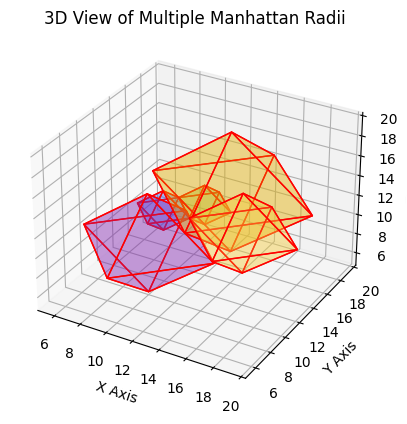

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Define a function to create vertices of an octahedron centered at (cx, cy, cz) with radius r
def create_octahedron_vertices(cx, cy, cz, r):
    return np.array([
        [cx + r, cy, cz], [cx - r, cy, cz],
        [cx, cy + r, cz], [cx, cy - r, cz],
        [cx, cy, cz + r], [cx, cy, cz - r]
    ])

# Define the sides of the octahedron (triangles)
def create_octahedron_faces(vertices):
    return [
        [vertices[0], vertices[2], vertices[4]],
        [vertices[0], vertices[3], vertices[4]],
        [vertices[0], vertices[3], vertices[5]],
        [vertices[0], vertices[2], vertices[5]],
        [vertices[1], vertices[2], vertices[4]],
        [vertices[1], vertices[3], vertices[4]],
        [vertices[1], vertices[3], vertices[5]],
        [vertices[1], vertices[2], vertices[5]]
    ]

# List of positions and radii for the octahedrons
octahedrons = [
    ((10, 12, 12), 2),
    ((12, 14, 12), 2),
    ((16, 12, 12), 4),
    ((14, 14, 14), 6),
    ((10, 10, 10), 5)
]

# Plot the octahedrons
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for pos, radius in octahedrons:
    vertices = create_octahedron_vertices(*pos, radius)
    faces = create_octahedron_faces(vertices)

    # Create a 3D polygon for each face
    poly3d = [list(map(lambda x: [x[0], x[1], x[2]], face)) for face in faces]
    ax.add_collection3d(Poly3DCollection(poly3d, facecolors=np.random.rand(3,), linewidths=1, edgecolors='r', alpha=.25))

# Set limits and labels
ax.set_xlim([5, 20])
ax.set_ylim([5, 20])
ax.set_zlim([5, 20])
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

# Show the plot
plt.title('3D View of Multiple Manhattan Radii')
plt.show()